In [2]:
from getday import day
import numpy as np
import re

In [3]:
# Part 1
example = False
width, height = (11, 7) if example else (101, 103)
dt = 100
q1, q2, q3, q4 = 0, 0, 0, 0
for px, py, vx, vy in map(lambda t: list(map(int, t)), map(lambda line: re.search(r'p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)', line).groups(), day(14, example).strip().splitlines())):
    px = (px + dt * vx) % width
    py = (py + dt * vy) % height
    if px < width // 2 and py < height // 2:   q1 += 1
    elif px < width // 2 and py > height // 2: q2 += 1
    elif px > width // 2 and py < height // 2: q3 += 1
    elif px > width // 2 and py > height // 2: q4 += 1
q1*q2*q3*q4
#218295000

218295000

In [4]:
# Part 2
example = False
width, height = (11, 7) if example else (101, 103)

positions, velocities = [], []
for px, py, vx, vy in map(lambda t: list(map(int, t)), map(lambda line: re.search(r'p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)', line).groups(), day(14, example).strip().splitlines())):
    positions.append((px, py))
    velocities.append((vx, vy))
    
dt = 1
all_pos = []
qs = []
for t in range(1, 9999):
    q1, q2, q3, q4 = 0, 0, 0, 0
    for i, ((px, py), (vx, vy)) in enumerate(zip(positions, velocities)):
        px = (px + dt * vx) % width
        py = (py + dt * vy) % height
        if px < width // 2 and py < height // 2:    q1 += 1
        elif px < width // 2 and py > height // 2:  q2 += 1
        elif px > width // 2 and py < height // 2:  q3 += 1
        elif px > width // 2 and py > height // 2:  q4 += 1
        positions[i] = px, py
    all_pos.append((t, positions[:], (width, height)))
    qs.append((q1, q2, q3, q4))

n_per_quad = np.array(qs)
part2 = int((n_per_quad.argmax(axis=0)[n_per_quad.max(axis=0) == n_per_quad.max()] + 1)[0])
print('Part 2:', part2)

Part 2: 6870


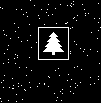

In [5]:
from PIL import Image 

room = np.zeros(shape=(height, width))
for px, py in all_pos[part2-1][1]:
    room[py, px] = 1
img = Image.fromarray(np.uint8(room) * 255)
display(img)